# DATA 512 -- Project Notebook
### Keegan Freeman
### 10/30/22

## Data Importing & Analysis

Collect Data for Mask Use by County

Collect Data for US Confirmed Cases

Collect Data for Mask Mandates by County

In [1]:
# import pandas to read in csv files
import pandas as pd

# import mask-use-by-county.csv, RAW_us_confirmed_cases.csv, and U.S._State_and_Territorial_Public_Mask_Mandates.csv, respectively
# Save imported data to self-describing "raw" dataframes

mask_use_raw = pd.read_csv('mask-use-by-county.csv')
confirmed_cases_raw = pd.read_csv('RAW_us_confirmed_cases.csv')
mask_mandates_raw = pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates.csv')

Print head of raw mask use dataframe to look at schema and verify *correctness*

In [2]:
# check out raw mask use df
mask_use_raw.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


Print head of raw confirmed cases dataframe to look at schema and verify *correctness*

In [3]:
# check out raw confirmed cases df
confirmed_cases_raw.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18480,18480,18480,18480,18511,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65895,65895,65895,65895,65973,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6926,6926,6926,6926,6930,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7560,7560,7560,7560,7575,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17286,17286,17286,17286,17320,17320,17320,17320,17320


Print head of raw mask mandates dataframe to look at schema and verify *correctness*

In [4]:
# check out raw mask mandates df
mask_mandates_raw.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


## Data Sampling for Fort-Bend County

Collect Fort-Bend County mask-use information based on FIPIS code (48157)

Display head to verify *correctness*

In [5]:
# Make new df for fort-bend mask use based on single row of raw df associated to fort-bend
mask_use = mask_use_raw.loc[mask_use_raw['COUNTYFP'] == 48157]
mask_use.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
2601,48157,0.024,0.03,0.057,0.115,0.774


Collect Fort-Bend County confirmed cases information based on Admin2 column representing county name

Display head to verify *correctness*

In [6]:
# Make new df for fort-bend confirmed cases
# Filtering by "Fort Bend" 
# Returns single row with county information as well as over a thousand columns for date and number of confirmed cases
confirmed_cases = confirmed_cases_raw.loc[confirmed_cases_raw["Admin2"] == "Fort Bend"]
confirmed_cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
2778,Texas,Fort Bend,84048157,US,USA,840,48157.0,US,29.527045,-95.772195,...,234559,234559,234640,234640,234684,234684,234753,234753,234753,234839


Collect Fort-Bend County mask mandate information based on County_Name column

Display head to verify *correctness*

In [7]:
# Filter by county name
# Each row represents separate date and its associated masking mandate
# NaN translates to NO local masking policy in place
mask_mandates = mask_mandates_raw.loc[mask_mandates_raw["County_Name"] == "Fort Bend County"]
mask_mandates.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
691687,TX,Fort Bend County,48,157,5/3/2020,2,NaN,NaN,NaN,NaN
691867,TX,Fort Bend County,48,157,4/10/2020,2,NaN,NaN,NaN,NaN
691868,TX,Fort Bend County,48,157,4/11/2020,2,NaN,NaN,NaN,NaN
691869,TX,Fort Bend County,48,157,4/12/2020,2,NaN,NaN,NaN,NaN
691870,TX,Fort Bend County,48,157,4/13/2020,2,NaN,NaN,NaN,NaN


## Data Transformations

Create df of the confirmed case values for Fort Bend free from county misc. information -- only contains date associated confirmed cases

Create list for field values representing confirmed cases in Fort Bend

Create list for range of dates

Create list representing the gradient (slope) of confirmed cases using numpys inherent function

In [8]:
import numpy as np

# Remove etraneous information, separate confirmed cases and data range into separate lists
confirmed_cases_vals_no_fluff = confirmed_cases.drop(labels=['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
confirmed_cases_vals = confirmed_cases_vals_no_fluff.values.tolist()[0]
confirmed_cases_dates = confirmed_cases_vals_no_fluff.columns.values.tolist()

# Find derivative of confirmed cases using numpy's gradient
slope_cases = np.gradient(confirmed_cases_vals)

Install ruptures in kernal 

In [9]:
import sys
!{sys.executable} -m pip install ruptures

Find breakpoints using ruptures library -- Pelt Search Method

In [10]:
import ruptures as rpt

algo = rpt.Pelt(model="rbf").fit(np.array(slope_cases))
changes = algo.predict(pen=10)

## Data Visualization

Create plot with separate axes so that we can plot both confirmed cases along with rate of change against date
Add line representing rollout of the COVID-19 vacine
Add lines for each breakpoint from Pelt Search
Add text including masking tendicies by Fort Bend county
Make it look pretty with colors, line-styles, and labels

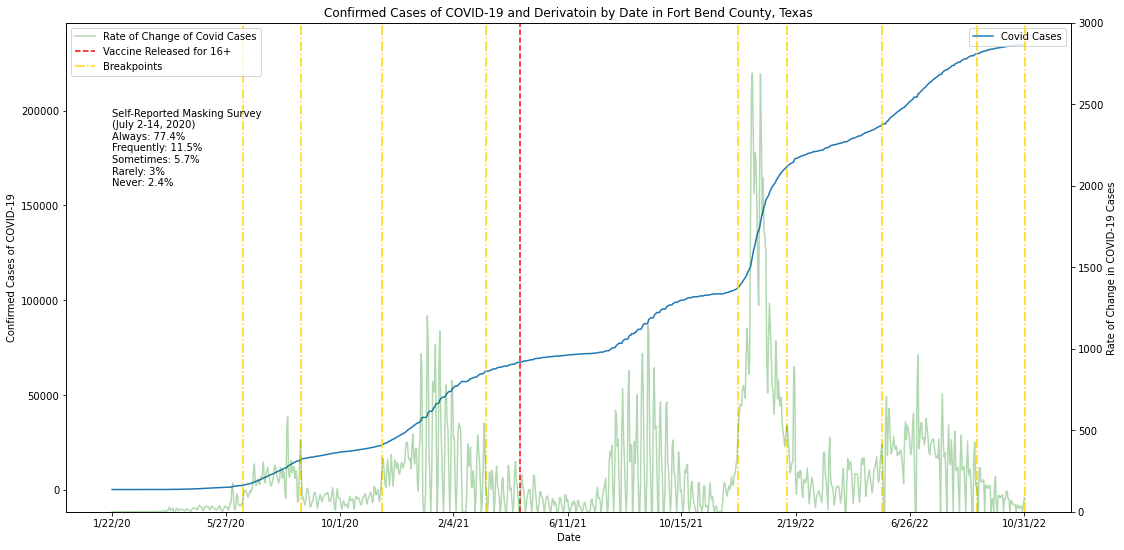

In [11]:
import matplotlib.pyplot as plt

# Make our figure (18 in x 9 in), create two identical axes for plotting on top of one another
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
ax2 = ax.twinx()

# Plot confirmed cases and it's derivative against date
ax.plot(confirmed_cases_vals_no_fluff.columns, confirmed_cases_vals)
ax2.plot(confirmed_cases_vals_no_fluff.columns, slope_cases, "g", alpha=0.3)

# Add labels for everything and include masking survey results
plt.title("Confirmed Cases of COVID-19 and Derivatoin by Date in Fort Bend County, Texas")
ax.set_ylabel("Confirmed Cases of COVID-19")
ax2.set_ylabel("Rate of Change in COVID-19 Cases")
ax.set_xlabel('Date')
plt.text(0, 2000, "Self-Reported Masking Survey\n(July 2-14, 2020)\nAlways: 77.4%\nFrequently: 11.5%\nSometimes: 5.7%\nRarely: 3%\nNever: 2.4%")

# Set our xticks so it's not a messy x-axis
ax.set_xticks(["1/22/20", "5/27/20", "10/1/20", "2/4/21", "6/11/21", "10/15/21", "2/19/22", "6/26/22", "10/31/22"])
ax2.set_ylim(0, 3000)

# Make our vertical line representing general vacine rollout
plt.vlines(453, 0, 235000, colors="red", linestyles="dashed")

# Make our vertical lines for each breakpoint
for i in changes:
    plt.vlines(i, 0, 235000, colors="gold", linestyles="dashdot")

# Add some legends
ax.legend(["Covid Cases", "Test"], loc="upper right")
ax2.legend(["Rate of Change of Covid Cases", "Vaccine Released for 16+", "Breakpoints"], loc="upper left")
plt.savefig("Fort_Bend_Covid_Analysis.png")

# Project Extension

## Data Importing & Analysis

In [12]:
housing = pd.read_csv('housing.csv')
housing.columns = ["Date", "Total Listings"]

## Plot raw total listing data for Fort Bend County

Text(0.5, 1.0, 'Total listings by Date in Fort Bend County, Texas')

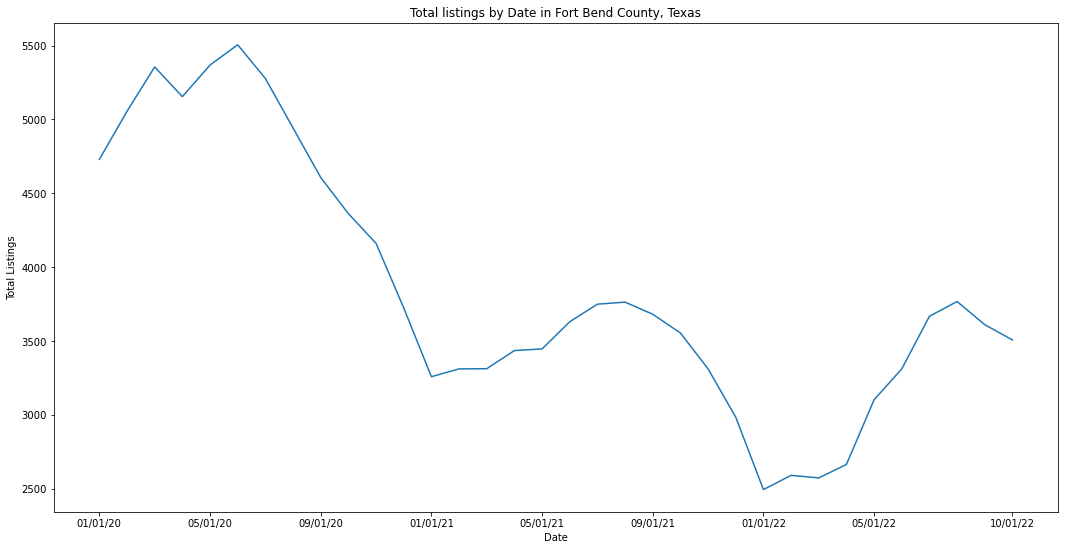

In [13]:
# Make our figure (18 in x 9 in)
fig, ax = plt.subplots(1,1, figsize =(18,9))

plt.plot(housing['Date'], housing['Total Listings'])
ax.set(xticks=[0, 4, 8, 12, 16, 20, 24, 28, 33])
ax.set(xticklabels = ["01/01/20", "05/01/20", "09/01/20", "01/01/21", "05/01/21", "09/01/21", "01/01/22", "05/01/22", "10/01/22"])
ax.set_ylabel("Total Listings")
ax.set_xlabel("Date")
plt.title("Total listings by Date in Fort Bend County, Texas")

## Discretize Total Listings by Day

For each day present in the housing timeframe, duplicate the total housing market listing of it's associated month

In [14]:
from datetime import datetime

new_dates = []
new_lists = []

dum_dic = {"Date": ['2022-11-01'], "Total Listings": [3507.0]}
dum_df = pd.DataFrame(dum_dic)
housing = housing.append(dum_df, ignore_index=True)

i = 0
for day in confirmed_cases_vals_no_fluff.columns:
    new_dates.append(day)
    if(datetime.strptime(day, '%m/%d/%y') != datetime.strptime(housing['Date'][i+1], '%Y-%m-%d')):
        new_lists.append(housing["Total Listings"][i])
    else:
        new_lists.append(housing["Total Listings"][i+1])
        i = i + 1

sh = {"Date": new_dates, "Total Listings": new_lists}
step_housing = pd.DataFrame(sh)

Take a look to see if it worked

In [15]:
step_housing

,Date,Total Listings
0,1/22/20,4729.0
1,1/23/20,4729.0
2,1/24/20,4729.0
3,1/25/20,4729.0
4,1/26/20,4729.0
...,...,...
1009,10/27/22,3507.0
1010,10/28/22,3507.0
1011,10/29/22,3507.0
1012,10/30/22,3507.0


## Plot Step-wise Total Listings by Date

Text(0.5, 1.0, 'Discritized Total listings by Date in Fort Bend County, Texas')

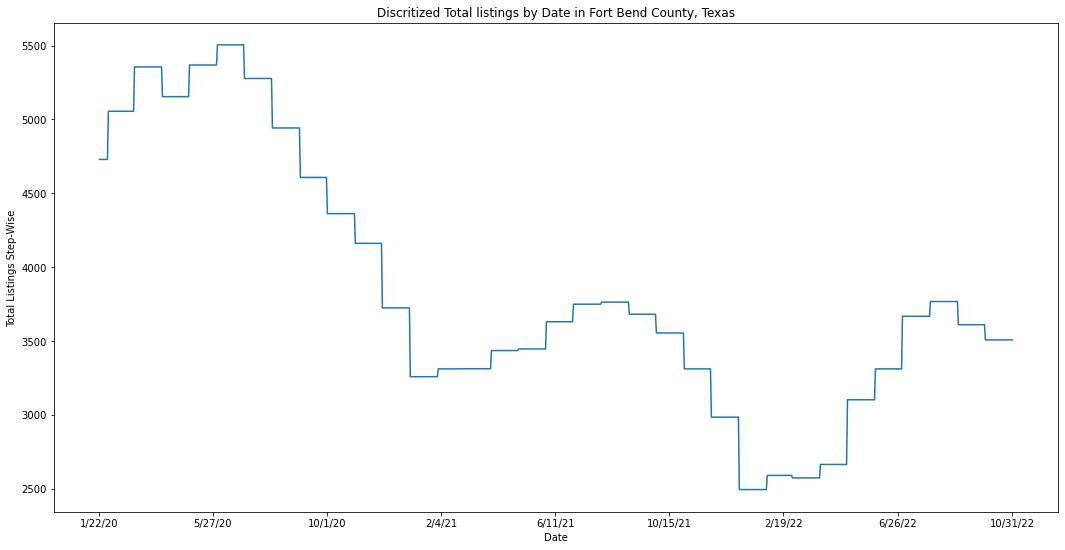

In [16]:
# Make our figure (18 in x 9 in)
fig, ax = plt.subplots(1,1, figsize =(18,9))

plt.plot(step_housing['Date'], step_housing['Total Listings'])
#ax.set(xticks=[0, 4, 8, 12, 16, 20, 24, 28, 33])
#ax.set(xticklabels = ["01/01/20", "05/01/20", "09/01/20", "01/01/21", "05/01/21", "09/01/21", "01/01/22", "05/01/22", "10/01/22"])
ax.set_xticks(["1/22/20", "5/27/20", "10/1/20", "2/4/21", "6/11/21", "10/15/21", "2/19/22", "6/26/22", "10/31/22"])
ax.set_ylabel("Total Listings Step-Wise")
ax.set_xlabel("Date")
plt.title("Discritized Total listings by Date in Fort Bend County, Texas")

## Plot stepped Total Listings against Raw Covid Rate by Date

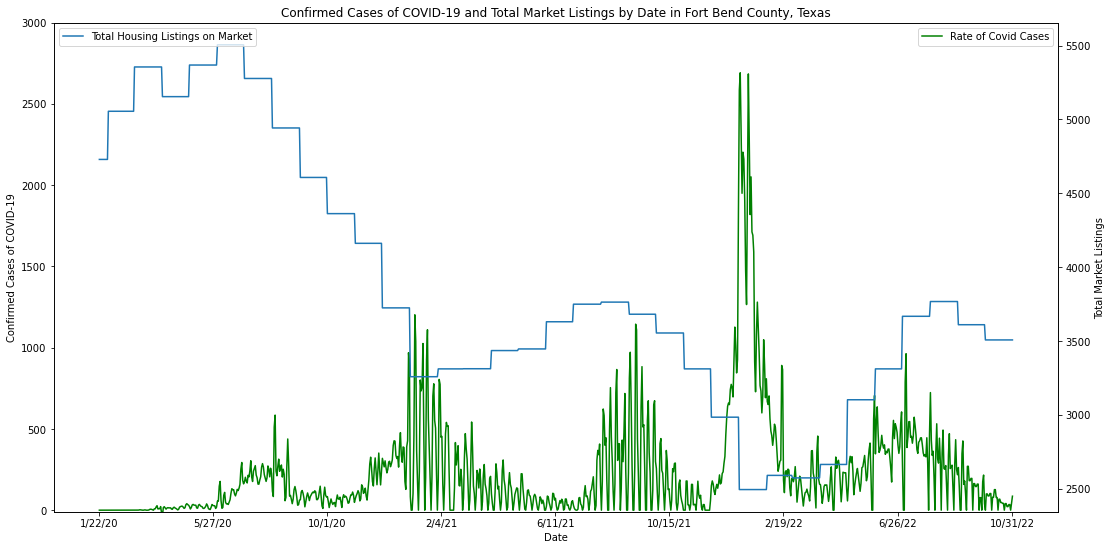

In [17]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
ax2 = ax.twinx()

# Plot confirmed cases and it's derivative against date
ax.plot(confirmed_cases_vals_no_fluff.columns, slope_cases, "g")
ax2.plot(confirmed_cases_vals_no_fluff.columns, step_housing['Total Listings'])

# Add labels for everything and include masking survey results
plt.title("Confirmed Cases of COVID-19 and Total Market Listings by Date in Fort Bend County, Texas")
ax.set_ylabel("Confirmed Cases of COVID-19")
ax2.set_ylabel("Total Market Listings")
ax.set_xlabel('Date')

# Set our x-ticks so it's not messy
ax.set_xticks(["1/22/20", "5/27/20", "10/1/20", "2/4/21", "6/11/21", "10/15/21", "2/19/22", "6/26/22", "10/31/22"])
ax.set_ylim(-10, 3000)

# Add some legends
ax.legend(["Rate of Covid Cases"], loc="upper right")
ax2.legend(["Total Housing Listings on Market"], loc="upper left")

## Curve Smoothing

### ***Smoothing Covid Rate with natural cubic splines***

Experimental, we'll see how worthwile these are based on their plots

Text(0.5, 1.0, 'Cubic Spline Smoothing Test')

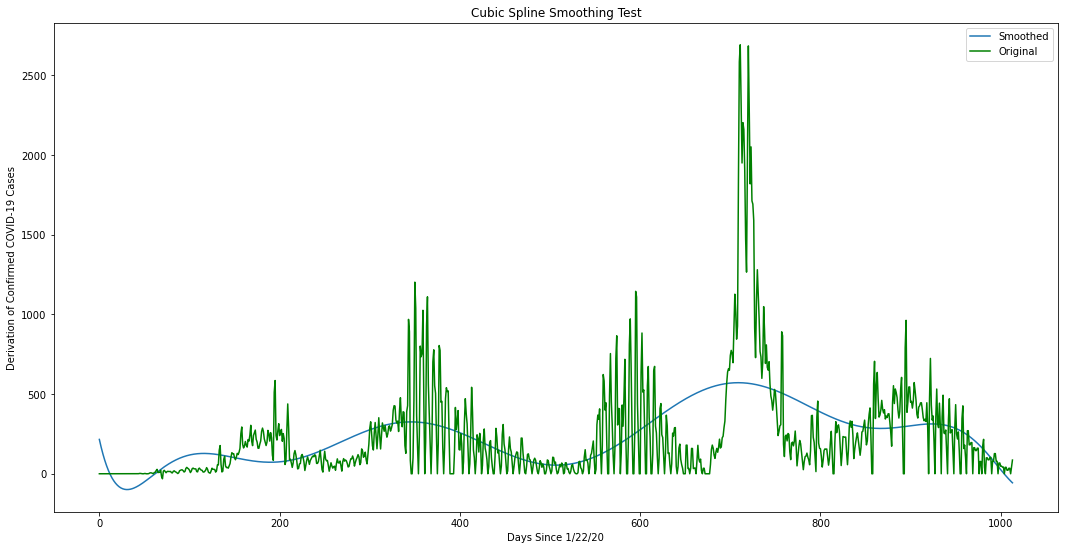

In [39]:
ran = range(0, len(confirmed_cases_vals_no_fluff.columns))
rate_model = np.poly1d(np.polyfit(ran, slope_cases,10))

fig = plt.figure(figsize=(18,9))
plt.plot(ran, rate_model(ran))
plt.plot(ran, slope_cases, "g")
plt.xlabel("Days Since 1/22/20")
plt.ylabel("Derivation of Confirmed COVID-19 Cases")
plt.legend(["Smoothed","Original"])
plt.title("Cubic Spline Smoothing Test")

Text(0, 0.5, 'Derivation of Confirmed COVID-19 Cases')

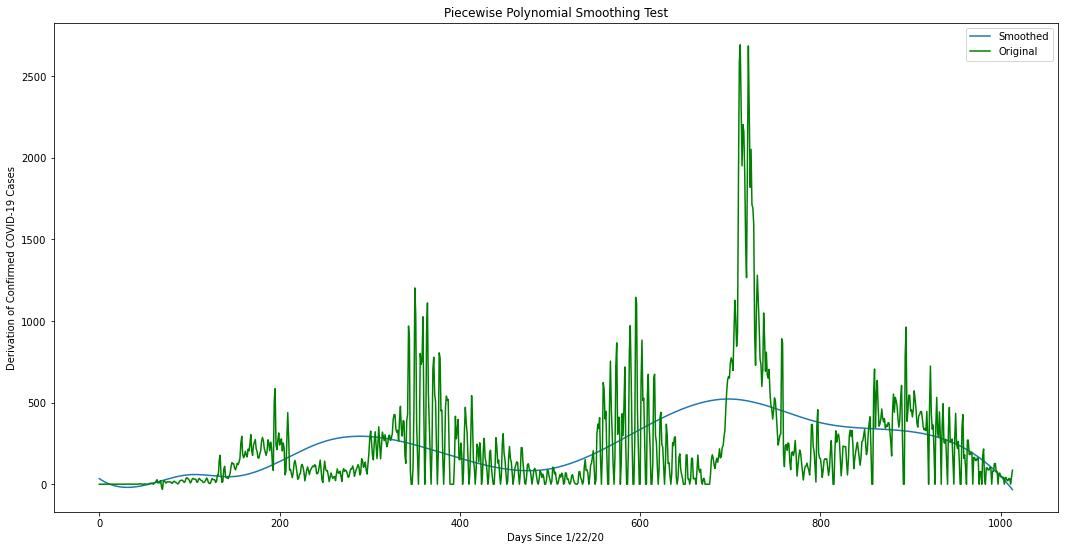

In [40]:
from patsy import dmatrix
ran = range(0, len(confirmed_cases_vals_no_fluff.columns))
transformed_x = dmatrix("bs(train, knots=(100,150,250,500,700, 800), degree=3, include_intercept=False)",
                        {"train": ran},return_type='dataframe')

import statsmodels.api as sm
cs = sm.GLM(slope_cases, transformed_x).fit()

curve = cs.predict(dmatrix("bs(xp, knots=(100,150,250,500,700, 800), include_intercept=False)", 
                          {"xp": ran}, return_type='dataframe'))

fig = plt.figure(figsize=(18,9))
plt.plot(ran, curve)
plt.plot(ran, slope_cases, "g")
plt.xlabel("Days Since 1/22/20")
plt.ylabel("Derivation of Confirmed COVID-19 Cases")
plt.legend(["Smoothed","Original"])
plt.title("Piecewise Polynomial Smoothing Test")
plt.ylabel("Derivation of Confirmed COVID-19 Cases")

### Construct Rolling Averages

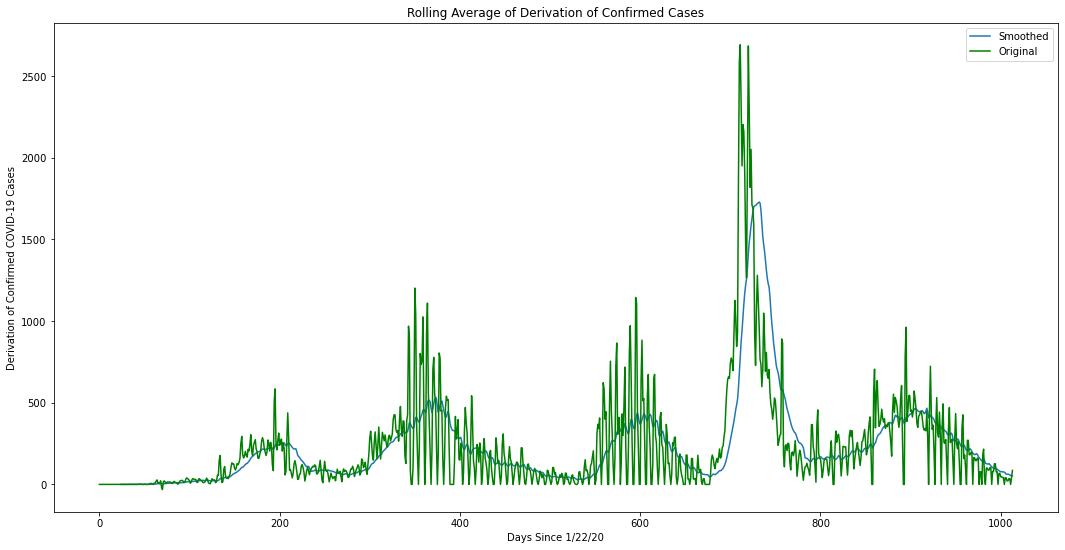

In [41]:
# Rolling average of covid rate

sc = pd.DataFrame(slope_cases)
df_mva = sc.rolling(25).mean() 

fig = plt.figure(figsize=(18,9))
plt.plot(ran, df_mva)
plt.plot(ran, slope_cases, "g")
plt.title("Rolling Average of Derivation of Confirmed Cases")
plt.xlabel("Days Since 1/22/20")
plt.ylabel("Derivation of Confirmed COVID-19 Cases")
plt.legend(["Smoothed","Original"])

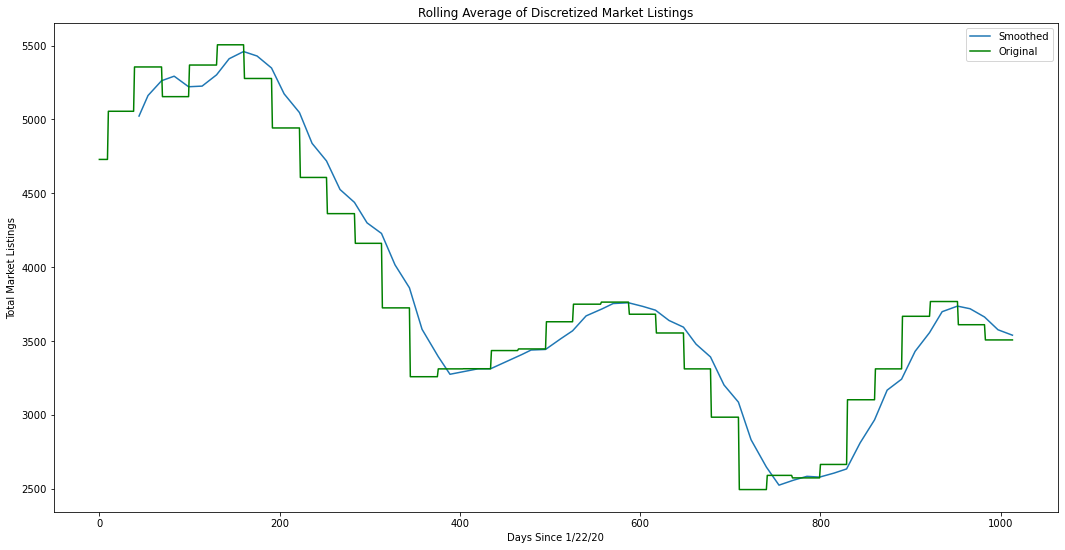

In [43]:
# Rolling Average of market listings
sh = pd.DataFrame(step_housing['Total Listings'])
sh_mva = sh.rolling(45).mean()
                               
fig = plt.figure(figsize=(18,9))
plt.plot(ran, sh_mva)
plt.plot(ran, sh, "g")
plt.title("Rolling Average of Discretized Market Listings")
plt.xlabel("Days Since 1/22/20")
plt.ylabel("Total Market Listings")
plt.legend(["Smoothed","Original"])

### Plotting Rolling Averages Together

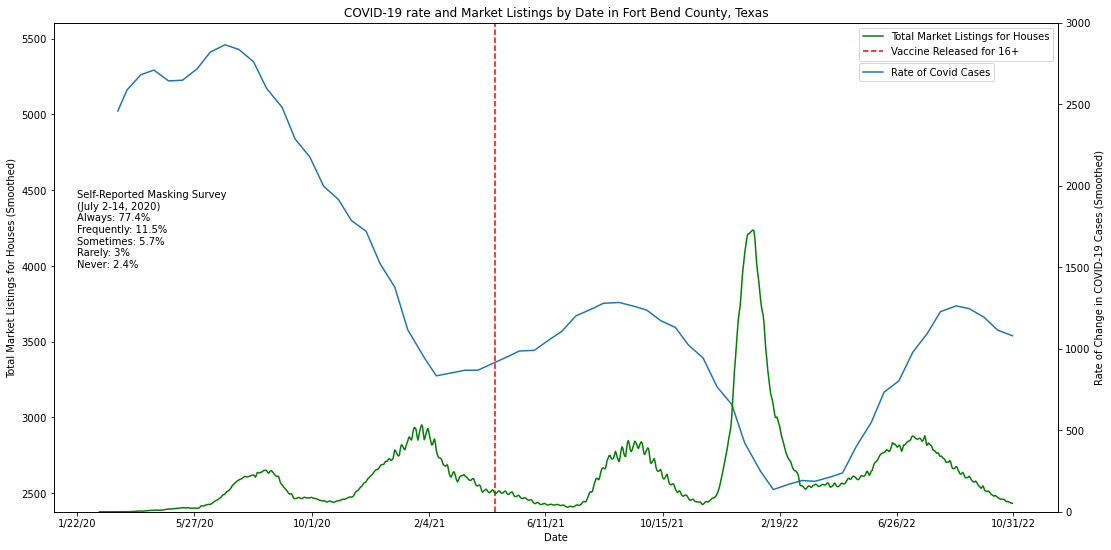

In [23]:
# Make our figure (18 in x 9 in), create two identical axes for plotting on top of one another
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
ax2 = ax.twinx()

# Plot confirmed cases and it's derivative against date
ax.plot(ran, sh_mva)
ax2.plot(ran, sc_mva, "g")

# Add labels for everything and include masking survey results
plt.title("COVID-19 rate and Market Listings by Date in Fort Bend County, Texas")
ax.set_ylabel("Total Market Listings for Houses (Smoothed)")
ax2.set_ylabel("Rate of Change in COVID-19 Cases (Smoothed)")
ax.set_xlabel('Date')
plt.text(0, 1500, "Self-Reported Masking Survey\n(July 2-14, 2020)\nAlways: 77.4%\nFrequently: 11.5%\nSometimes: 5.7%\nRarely: 3%\nNever: 2.4%")

# Set our xticks so it's not a messy x-axis
ax.set(xticks=[0,127,254,381,507,634,761,888,1014])
ax.set(xticklabels = ["1/22/20", "5/27/20", "10/1/20", "2/4/21", "6/11/21", "10/15/21", "2/19/22", "6/26/22", "10/31/22"])
ax2.set_ylim(0, 3000)

# Make our vertical line representing general vacine rollout
plt.vlines(453, 0, 235000, colors="red", linestyles="dashed")

# Make our vertical lines for each breakpoint
#for i in changes:
#    plt.vlines(i, 0, 235000, colors="gold", linestyles="dashdot")

# Add some legends
ax.legend(["Rate of Covid Cases"], loc=(0.8015, 0.88))
ax2.legend(["Total Market Listings for Houses", "Vaccine Released for 16+", "Breakpoints"], loc="upper right")
#plt.savefig("Fort_Bend_Covid_Analysis.png")

## Finding Coorelations

### Pearson Coorelation

In [24]:
# Find overall Pearson Coorelation
my_rho = np.corrcoef(slope_cases, step_housing['Total Listings'])

print("Pearson Coorelation: " + str(my_rho[0][1]))

Pearson Coorelation: -0.3931893600933566


### Spearman's Coorelation

In [27]:
# Find overall Pearson Coorelation
import scipy

my_rho = scipy.stats.spearmanr(slope_cases, step_housing['Total Listings'])

print("Spearman's Coorelation: " + str(my_rho[0]))

Spearman's Coorelation: -0.38747950768749034


### Time Lagged Cross Correlation

In [28]:
def crosscorr(datax, datay, lag=0, wrap=False):
    datax = pd.Series(datax)
    datay = pd.Series(datay)
    
    if wrap:
        shiftedy = datay.shift(lag, fill_value=0)
        #print(shiftedy.shape)
        shifty = datay[-lag:]
        shifty = shifty.append(shiftedy)
        #print(shifty.shape)
        #print()
        
        return datax.corr(shifty)
    else: 
        return datax.corr(datay.shift(lag))

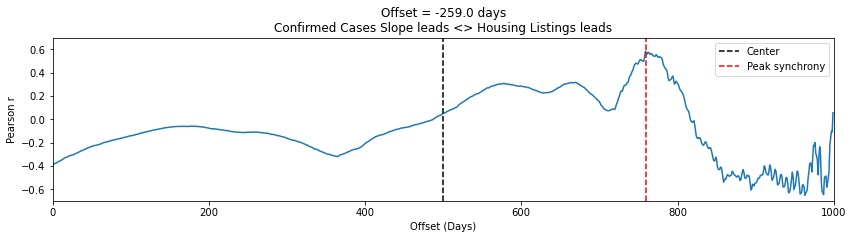

In [44]:
d1 = slope_cases
d2 = step_housing['Total Listings']

rs = [crosscorr(d1,d2, lag) for lag in range(0,1000)]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(500,color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} days\nConfirmed Cases Slope leads <> Housing Listings leads',ylim=[-0.7,0.7],xlim=[0,1000], xlabel='Offset (Days)',ylabel='Pearson r')
plt.legend()

### Windowed Time Lagged Cross Correlation

[Text(0.5, 1.0, 'Windowed Time Lagged Cross Correlation'),
 (0.0, 50.0),
 Text(0.5, 24.0, 'Offset'),
 Text(69.0, 0.5, 'Window epochs')]

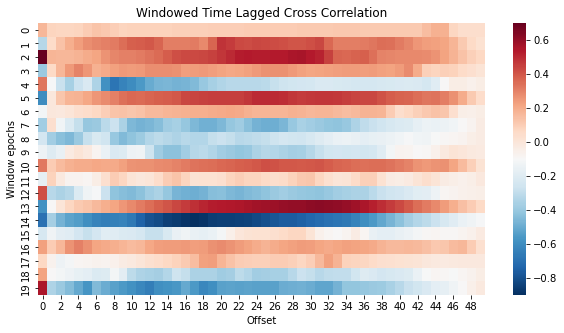

In [30]:
# Windowed time lagged cross correlation
import seaborn as sns

no_splits = 20
samples_per_split = len(slope_cases)/no_splits

sc = pd.Series(slope_cases)
sc = sc.replace(0, 1)

rss=[]
for t in range(0, no_splits):
    d1 = sc.loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = step_housing['Total Listings'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag, wrap=True) for lag in range(0, int(samples_per_split))]
    rss.append(rs)
    
rss = pd.DataFrame(rss)
#print(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,int(samples_per_split)], xlabel='Offset',ylabel='Window epochs')
#ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
#ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);